In [267]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


In [268]:
csv_file ="cars.csv"
df = pd.read_csv(csv_file, sep=",")
print(df.shape)
print(df.info())
print(df.isna().sum())

(8128, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         7907 non-null   float64
 10  max_power      7912 non-null   float64
 11  seats          7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB
None
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine  

In [269]:
df = df.fillna(value=float(0))
# no more NaN values (substitute by 0)

year = [2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]
max : 2020
min : 1983


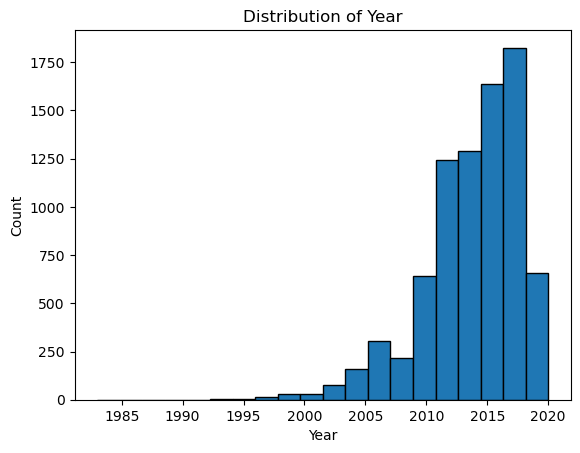

In [270]:
# Analyze the variable 'Year'

print(f"{df.columns[1]} = {df.iloc[:, 1].unique()}")
print("max :", np.max(df.year))
print("min :", np.min(df.year))
# Create a histogram of the 'year' column
plt.hist(df['year'], bins=20, edgecolor='k')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Year')
plt.show()

In [271]:
# Define the list of categorical column to encode
categorical_var = ['year','fuel', 'seller_type', 'transmission', 'owner', 'seats']

for i in categorical_var :
    le=preprocessing.LabelEncoder().fit(df[i])
    print(list(le.classes_))
    df[i] = le.transform(df[i])

[1983, 1991, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
['CNG', 'Diesel', 'LPG', 'Petrol']
['Dealer', 'Individual', 'Trustmark Dealer']
['Automatic', 'Manual']
['First Owner', 'Fourth & Above Owner', 'Second Owner', 'Test Drive Car', 'Third Owner']
[0.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 14.0]


In [272]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,22,450000,145500,1,1,1,0,23.40,1248.0,74.00,3
1,Skoda Rapid 1.5 TDI Ambition,22,370000,120000,1,1,1,2,21.14,1498.0,103.52,3
2,Honda City 2017-2020 EXi,14,158000,140000,3,1,1,4,17.70,1497.0,78.00,3
3,Hyundai i20 Sportz Diesel,18,225000,127000,1,1,1,0,23.00,1396.0,90.00,3
4,Maruti Swift VXI BSIII,15,130000,120000,3,1,1,0,16.10,1298.0,88.20,3
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,21,320000,110000,3,1,1,0,18.50,1197.0,82.85,3
8124,Hyundai Verna CRDi SX,15,135000,119000,1,1,1,1,16.80,1493.0,110.00,3
8125,Maruti Swift Dzire ZDi,17,382000,120000,1,1,1,0,19.30,1248.0,73.90,3
8126,Tata Indigo CR4,21,290000,25000,1,1,1,0,23.57,1396.0,70.00,3


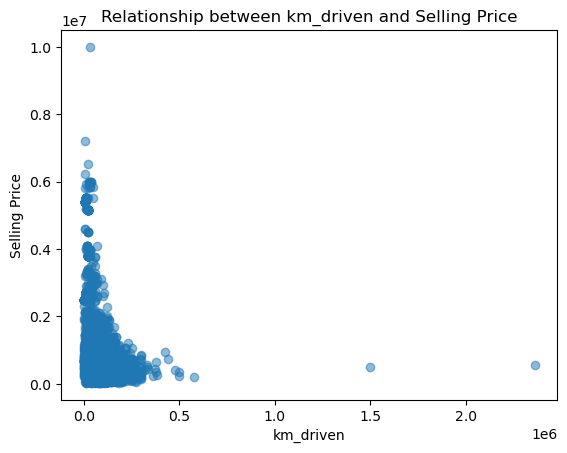

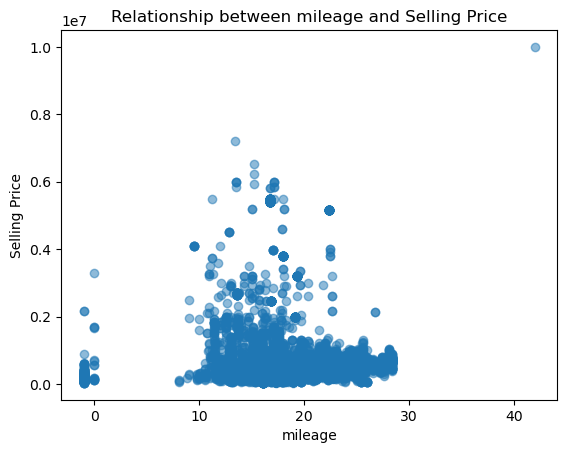

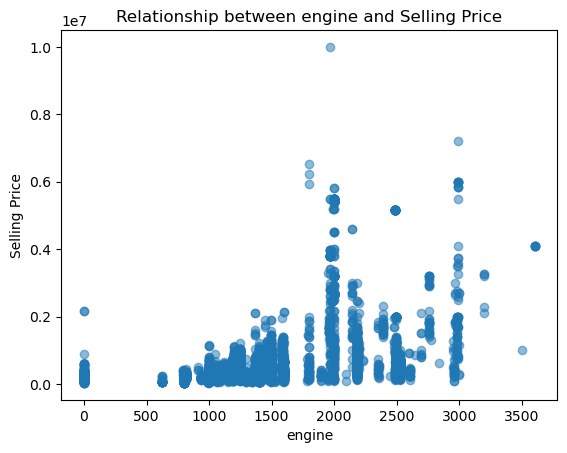

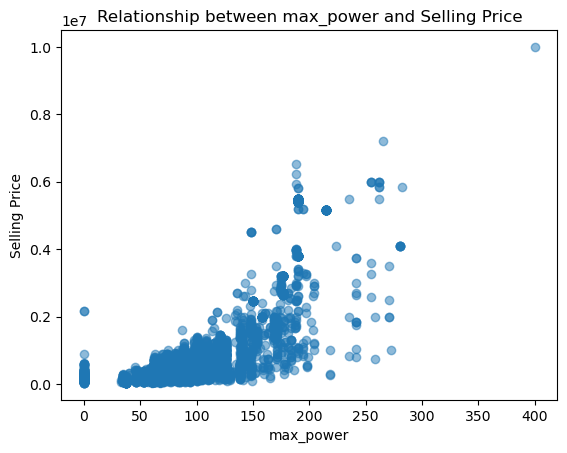

In [273]:
column_names = ['km_driven', 'mileage', 'engine', 'max_power']
for i in column_names:
    plt.scatter(df[i], df['selling_price'], alpha=0.5)
    plt.xlabel(i)
    plt.ylabel('Selling Price')
    plt.title(f'Relationship between {i} and Selling Price')
    plt.show()

## Data Splitting

In [293]:
train_df_1, test_df = train_test_split(df, test_size=0.20,random_state = 2)
train_df_2, val_df = train_test_split(train_df_1, test_size=0.2, random_state=42)
y = train_df_1.columns[1]
X = train_df_1.columns[2:,]

## Data Scaling

In [294]:
target = train_df_1.columns[2]
categorical_var.extend(columns_to_scale[1:])
features = categorical_var

In [295]:
columns_to_scale = ['selling_price','km_driven', 'mileage', 'engine', 'max_power']
columns_to_scale[1:]

['km_driven', 'mileage', 'engine', 'max_power']

In [296]:
#SCALE THE PREDICTORS VARIABLES FOR THE TRAINING DATASET
columns_to_scale = ['selling_price','km_driven', 'mileage', 'engine', 'max_power']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Define the columns you want to scale (e.g., numerical columns)

scaler.fit(train_df_1[columns_to_scale])

# Fit and transform the selected columns using the scaler on the TRAINING data
train_df_1[columns_to_scale] = scaler.transform(train_df_1[columns_to_scale])
test_df[columns_to_scale] = scaler.transform(test_df[columns_to_scale])
train_df_2[columns_to_scale] = scaler.transform(train_df_2[columns_to_scale])
val_df[columns_to_scale] = scaler.transform(val_df[columns_to_scale])



## Random Forest model

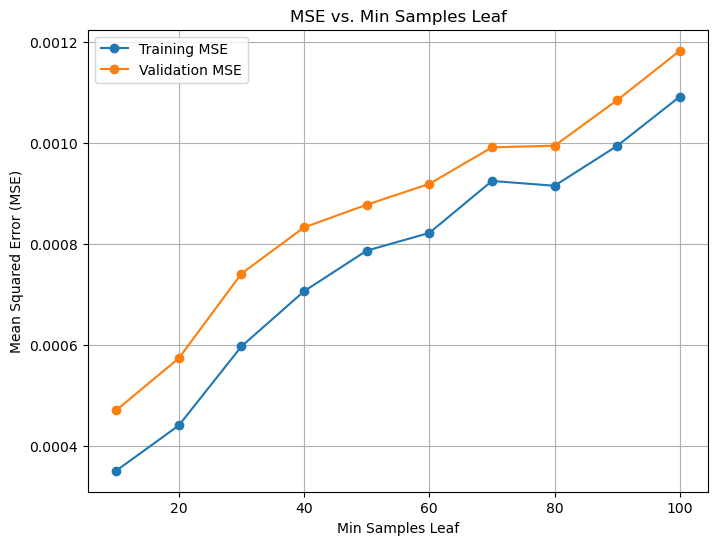

Best min_samples_leaf: 10


In [297]:
# Initialize lists to store MSE values for training and validation sets
mse_train = []
mse_val = []

# Vary the minimum size of terminal nodes
min_samples_leaf_values = list(range(10, 101, 10))

# Vary the max_features hyperparameter
max_features_values = [1, 2, 3]  # Experiment with different values

for min_samples_leaf in min_samples_leaf_values:
    # Create and train the Random Forest model with varying min_samples_leaf
    regr = RandomForestRegressor(n_estimators=20, min_samples_leaf=min_samples_leaf, max_features=3, random_state=0)  # Use max_features=3
    regr.fit(train_df_1[features], train_df_1[target])

    # Predict on the training set
    y_train_pred = regr.predict(train_df_1[features])
    mse_train.append(mean_squared_error(train_df_1[target], y_train_pred))

    # Predict on the validation set
    y_val_pred = regr.predict(val_df[features])
    mse_val.append(mean_squared_error(val_df[target], y_val_pred))

# Plot the MSE values as a function of min_samples_leaf
plt.figure(figsize=(8, 6))
plt.plot(min_samples_leaf_values, mse_train, marker='o', label='Training MSE')
plt.plot(min_samples_leaf_values, mse_val, marker='o', label='Validation MSE')
plt.xlabel('Min Samples Leaf')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('MSE vs. Min Samples Leaf')
plt.grid(True)
plt.show()
best_min_samples_leaf = min_samples_leaf_values[np.argmin(mse_val)]
print('Best min_samples_leaf:', best_min_samples_leaf)
